In [56]:
import pydataset as ds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statistics
from math import *
import pylab 
import scipy.stats as stats
from collections import Counter
from googletrans import Translator
from sklearn import preprocessing
from sklearn.cross_decomposition import CCA
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [3]:
#Считывание исходного фрейма и его вывод
D = ds.data("UScrime")
display(D)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234
6,121,0,110,118,115,547,964,25,44,84,29,689,126,0.034201,20.9995,682
7,127,1,111,82,79,519,982,4,139,97,38,620,168,0.042100,20.6993,963
8,131,1,109,115,109,542,969,50,179,79,35,472,206,0.040099,24.5988,1555
9,157,1,90,65,62,553,955,39,286,81,28,421,239,0.071697,29.4001,856
10,140,0,118,71,68,632,1029,7,15,100,24,526,174,0.044498,19.5994,705


In [4]:
#Стандартизация исходной матрицы
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(D)
Ds = scaler.transform(D)
display(pd.DataFrame(Ds))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.999382,1.391941,-1.322656,-0.918333,-0.876069,-1.280441,-1.132720,-0.096034,1.964753,0.702621,0.840356,-1.376330,1.697520,1.667599,-0.056599,-0.298163
1,0.355944,-0.718421,0.665173,0.612222,0.533794,0.545491,0.994049,-0.627045,0.008575,0.029823,0.241921,0.331211,0.000000,-0.777654,-0.185138,1.907645
2,0.275515,1.391941,-1.503368,-1.360493,-1.309873,-0.705147,-0.480968,-0.494292,1.158690,-0.082310,-0.117141,-2.172484,1.418822,1.614206,-0.327669,-0.854843
3,-0.207064,-0.718421,1.388020,2.176788,2.196710,0.395415,0.376600,3.196235,-0.207686,0.366222,0.600982,1.546393,-0.684075,-1.391068,0.471150,2.780560
4,0.195085,-0.718421,1.388020,0.816296,0.750696,0.745593,0.067876,-0.494292,-0.699188,-0.250510,-1.673072,0.551201,-0.506722,-0.253065,-0.755676,0.859625
5,-1.413509,-0.718421,0.394105,1.122406,1.256801,-0.354968,-0.652482,-0.308438,-0.561567,-0.642976,-0.595889,1.714004,-1.722856,-0.573064,-0.798509,-0.583037
6,-0.930931,1.391941,0.484461,-0.102037,-0.044611,-1.055326,-0.035033,-0.866000,0.372287,0.085889,0.481295,0.991180,-0.658739,-0.221900,-0.841326,0.151362
7,-0.609212,1.391941,0.303750,1.020369,1.039899,-0.480032,-0.480968,0.355325,0.765488,-0.923308,0.122234,-0.559225,0.304033,-0.310858,-0.285137,1.698564
8,1.481960,1.391941,-1.413012,-0.680246,-0.659167,-0.204892,-0.961206,0.063269,1.817302,-0.811175,-0.715576,-1.093486,1.140125,1.093885,0.399678,-0.128285
9,0.114655,-0.718421,1.116953,-0.476172,-0.442265,1.771116,1.577196,-0.786348,-0.846638,0.254089,-1.194324,0.006464,-0.506722,-0.115293,-0.998206,-0.522926


In [4]:
#Построение корреляционной матрицы (т.к исходная матрица стандартизована, корреляционная матрица совпадает с ковариационной)
R = np.dot(np.transpose(Ds), Ds)/len(Ds)
display(pd.DataFrame(R))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,0.593198,-0.224381,-0.244843,-0.670055,0.639211,0.361116,0.114511,-0.089472
1,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,0.767103,-0.172419,0.071693,-0.636945,0.737181,0.530862,0.066813,-0.090637
2,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,-0.664882,0.018103,-0.215682,0.735997,-0.768658,-0.389923,-0.253974,0.322835
3,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.213709,-0.043698,0.185093,0.787225,-0.630500,-0.473247,0.103358,0.687604
4,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.218768,-0.051712,0.169224,0.794262,-0.648152,-0.473027,0.075627,0.666714
5,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.341214,-0.229400,-0.420762,0.294632,-0.269886,-0.250086,-0.123640,0.188866
6,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,-0.327305,0.351892,-0.018692,0.179609,-0.167089,-0.050858,-0.427697,0.213914
7,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,0.095153,-0.038120,0.270422,0.308263,-0.126294,-0.347289,0.464210,0.337474
8,0.593198,0.767103,-0.664882,-0.213709,-0.218768,-0.341214,-0.327305,0.095153,1.000000,-0.156450,0.080908,-0.590107,0.677313,0.428059,0.230398,0.032599
9,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,-0.156450,1.000000,0.745925,0.044857,-0.063832,-0.007469,-0.169853,-0.050478


In [5]:
#Получение собственных векторов и собственных значений ковариационной матрицы
eigh_val, eigh_vec = np.linalg.eigh(R)
display(pd.Series(eigh_val))
display(pd.DataFrame(eigh_vec))

0     0.004335
1     0.047579
2     0.067929
3     0.084957
4     0.174532
5     0.192336
6     0.221239
7     0.242497
8     0.308055
9     0.362852
10    0.563802
11    1.130846
12    1.430069
13    2.018773
14    2.928000
15    6.222199
dtype: float64

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.006124,-0.132080,-0.024629,-0.173427,0.358262,0.139811,-0.168733,-0.059360,-0.520130,0.352270,-0.374541,0.189389,-0.274218,0.204643,0.003761,-0.289953
1,-0.008667,0.231680,-0.157493,-0.295489,0.298461,-0.204444,0.503256,0.397489,0.182679,-0.146600,-0.081818,-0.197643,-0.229351,0.029874,-0.199060,-0.313450
2,0.047370,-0.254084,0.246195,-0.311942,-0.146868,-0.316929,-0.233921,0.637965,-0.082560,0.113179,-0.006986,-0.056218,-0.063152,0.078558,0.223392,0.329615
3,0.702073,-0.009643,-0.091535,-0.337443,-0.147115,0.092262,0.061906,-0.281104,0.017100,0.084211,-0.030463,-0.208256,-0.212987,0.046986,-0.265759,0.319165
4,-0.704920,-0.087869,-0.036940,-0.337620,-0.138035,-0.001494,0.048531,-0.284712,-0.000392,0.077816,-0.056612,-0.238635,-0.199292,0.048159,-0.257896,0.320607
5,-0.034550,0.139042,-0.194607,-0.212659,0.381307,0.041389,-0.109820,-0.104314,0.277566,0.132354,0.557264,0.290363,-0.175182,0.300332,0.295056,0.170201
6,-0.004318,-0.026506,0.299300,0.160816,-0.223561,0.040858,0.589729,-0.082738,-0.102246,0.100849,0.018615,0.261127,-0.476908,-0.144940,0.356500,0.113410
7,-0.003057,0.063749,0.114169,0.129795,0.090106,-0.037290,0.177202,0.139722,-0.597297,0.005733,0.567354,0.028047,0.114267,0.040955,-0.442706,0.124164
8,0.038982,-0.091354,0.138570,0.319825,-0.095633,-0.567333,-0.178010,-0.151074,0.248870,0.389752,0.141124,-0.064646,-0.296145,0.093653,-0.272733,-0.272630
9,-0.021088,0.175449,-0.560326,-0.105335,-0.141740,-0.237026,-0.116505,0.050900,-0.165355,0.195759,0.039561,0.226282,-0.069981,-0.652389,0.032782,0.035505


In [6]:
#Рассчитывание вклада каждой компоненты в общую изменчивость данных (их информативность)
print('Вклад каждой компоненты в общую изменчивость признаков (в %): ', [i/sum(eigh_val)*100 for i in eigh_val])

Вклад каждой компоненты в общую изменчивость признаков (в %):  [0.02709604472833813, 0.2973675860890185, 0.42455431844435776, 0.5309804623600934, 1.0908253894900846, 1.2020980823711314, 1.3827436842207956, 1.5156058382041153, 1.9253431520227797, 2.2678271889580652, 3.5237641108933695, 7.0677878763542035, 8.937929826363813, 12.617329723366355, 18.300000795364845, 38.88874592076863]


In [7]:
#Нахождение главных компонент в порядке убывания их информационной значимости
First = np.dot(Ds, eigh_vec[:,15])
Second = np.dot(Ds, eigh_vec[:,14])
display(pd.Series(First))
display(pd.Series(Second))

0    -4.189511
1     1.543818
2    -4.322943
3     4.458200
4     1.966280
5     2.759565
6     0.268241
7     0.269766
8    -3.564232
9     0.975952
10    2.993550
11    0.956252
12    0.263250
13    0.233583
14   -3.369351
15   -2.915925
16   -0.491181
17   -0.071806
18    2.847857
19    2.485068
20    1.032093
21   -5.801420
22    0.064248
23    1.339405
24   -0.013087
25    4.613333
26    0.536993
27    0.288394
28    3.736206
29   -4.156765
30   -1.015729
31    1.637056
32   -1.791386
33    1.914382
34    1.493478
35    1.293458
36   -4.053129
37   -0.986317
38   -3.332968
39   -0.878560
40    1.414316
41   -0.961596
42   -2.388049
43    2.335138
44   -3.138237
45    1.517926
46    2.204385
dtype: float64

0    -1.300782
1     0.207433
2     0.189559
3    -3.002140
4     1.169594
5     0.088155
6    -0.052959
7    -1.833631
8    -0.999594
9     3.128643
10   -2.922061
11    0.085373
12    1.270016
13    2.008950
14   -0.127147
15   -2.300609
16    1.761171
17   -0.465074
18   -1.193969
19   -1.641833
20    0.388526
21   -1.265400
22   -0.735725
23    2.033230
24    2.828686
25    0.559950
26    1.293701
27    1.159573
28   -4.457660
29   -0.649706
30    2.010523
31   -0.961684
32    0.275084
33    0.709495
34   -2.599764
35   -1.750603
36   -0.357317
37    3.007659
38   -1.119063
39   -1.335997
40    1.920056
41    2.139333
42   -0.725603
43    0.498899
44   -0.912403
45    1.300374
46    2.676738
dtype: float64

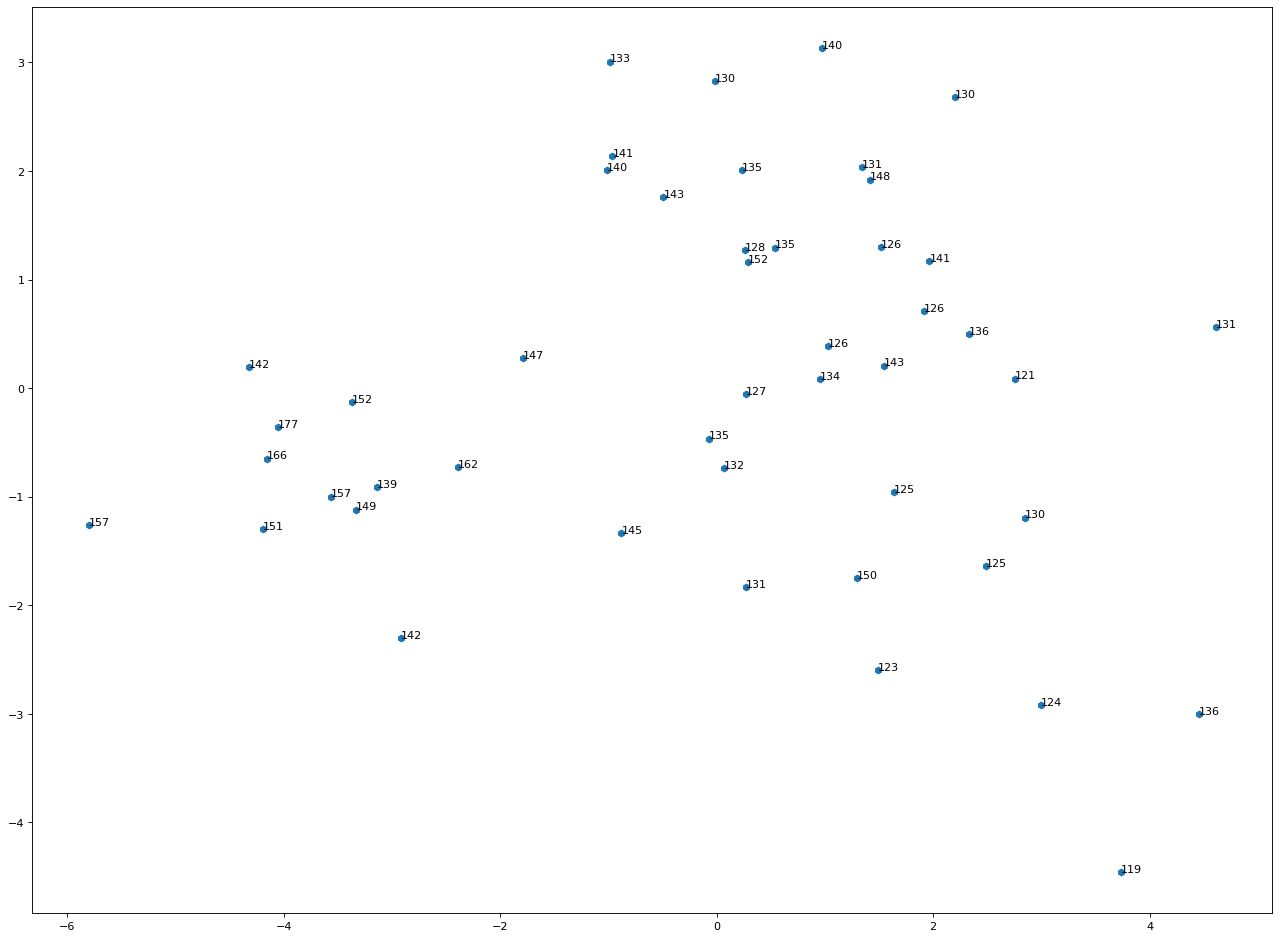

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(20, 15), dpi=80)
plt.scatter(x=First,y=Second, marker="h")

for i in range(len(First)):
    plt.annotate(D.iloc[i,0], (First[i], Second[i]))

In [13]:
MyData=ds.data('UScrime')
corr = MyData.corr()
corr.style.background_gradient(cmap='plasma')

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
M,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,0.593198,-0.224381,-0.244843,-0.670055,0.639211,0.361116,0.114511,-0.089472
So,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,0.767103,-0.172419,0.071693,-0.636945,0.737181,0.530862,0.066813,-0.090637
Ed,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,-0.664882,0.018103,-0.215682,0.735997,-0.768658,-0.389923,-0.253974,0.322835
Po1,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.213709,-0.043698,0.185093,0.787225,-0.630500,-0.473247,0.103358,0.687604
Po2,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.218768,-0.051712,0.169224,0.794262,-0.648152,-0.473027,0.075627,0.666714
LF,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.341214,-0.229400,-0.420762,0.294632,-0.269886,-0.250086,-0.123640,0.188866
M.F,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,-0.327305,0.351892,-0.018692,0.179609,-0.167089,-0.050858,-0.427697,0.213914
Pop,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,0.095153,-0.038120,0.270422,0.308263,-0.126294,-0.347289,0.464210,0.337474
NW,0.593198,0.767103,-0.664882,-0.213709,-0.218768,-0.341214,-0.327305,0.095153,1.000000,-0.156450,0.080908,-0.590107,0.677313,0.428059,0.230398,0.032599
U1,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,-0.156450,1.000000,0.745925,0.044857,-0.063832,-0.007469,-0.169853,-0.050478


In [71]:
G=ds.data('Computers')
display(G)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6255,1690,100,528,8,15,no,no,yes,39,35
6256,2223,66,850,16,15,yes,yes,yes,39,35
6257,2654,100,1200,24,15,yes,no,yes,39,35
6258,2195,100,850,16,15,yes,no,yes,39,35


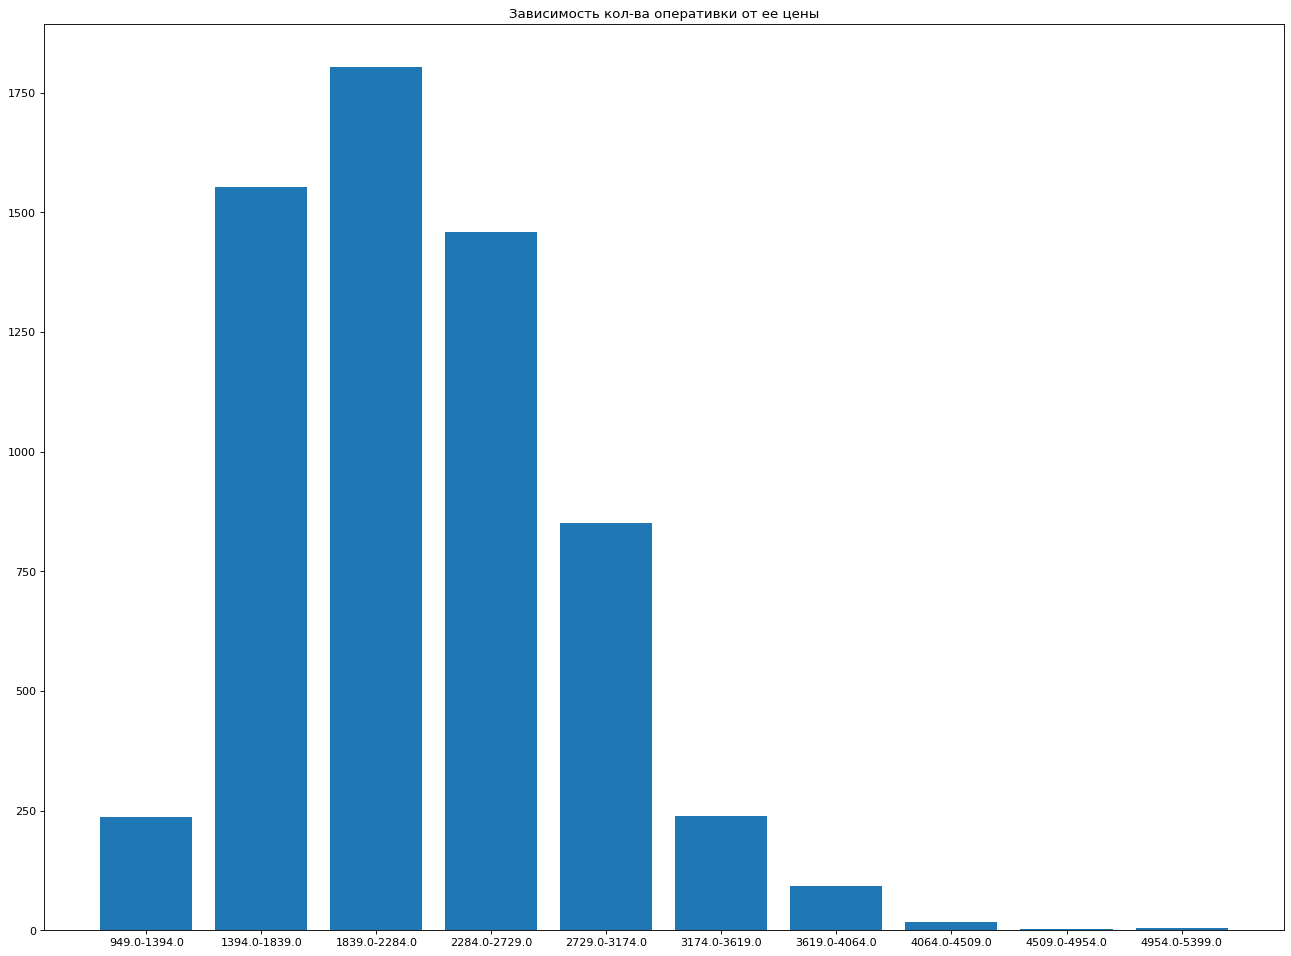

In [129]:
gg=(np.histogram(G['price']))
X = list(gg[1])
Y = list(gg[0])
intr = []

from matplotlib.pyplot import figure

figure(figsize=(20, 15), dpi=80)

for i in range(len(X)-1):
    intr.append(str(X[i]) + '-' + str(X[i+1]))
plt.bar(intr, Y)
plt.title("Зависимость кол-ва оперативки от ее цены")
plt.show()

In [110]:
data=ds.data('HairEyeColor')
display(data)

,Hair,Eye,Sex,Freq
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11
6,Brown,Blue,Male,50
7,Red,Blue,Male,10
8,Blond,Blue,Male,30
9,Black,Hazel,Male,10
10,Brown,Hazel,Male,25


In [113]:
ff=data.pivot_table(values='Freq',index='Sex',columns='Eye', aggfunc='sum')
ff

Eye,Blue,Brown,Green,Hazel
Sex,,,,
Female,114,122,31,46
Male,101,98,33,47


<BarContainer object of 4 artists>

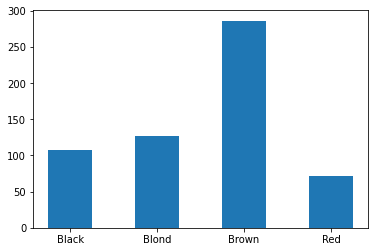

In [124]:
h=data.pivot_table('Freq',columns="Hair",aggfunc="sum")
h
plt.bar(list(h.columns), list(h.loc['Freq']), 0.5)

In [142]:
iris = ds.data('iris')
display(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [144]:
MyData=pd.DataFrame({'sl':iris['Sepal.Length'],
                  'sw':iris['Sepal.Width'],
                  'pl':iris['Petal.Length'],
                  'pw':iris['Petal.Width']})

corr = MyData.corr()
corr.style.background_gradient()

,sl,sw,pl,pw
sl,1.000000,-0.117570,0.871754,0.817941
sw,-0.117570,1.000000,-0.428440,-0.366126
pl,0.871754,-0.428440,1.000000,0.962865
pw,0.817941,-0.366126,0.962865,1.000000


In [149]:
corr.shape[0]

4

In [17]:
import pandas as pd
data = pd.read_excel("https://github.com/junaart/DataForR/blob/main/%D0%9D%D0%B0%D1%83%D0%BA%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D1%8B%20%D1%81%D0%B0%D0%BC%D0%B8.xlsx?raw=true", sheet_name="R3-2018")
display(data)
D=data.iloc[:,1:]
display(D)

,Unnamed: 0,P1_1,P1_2,P1_3,P2_1,P2_2,P2_3,P2_4,P2_5,P2_6,...,P3_7,P3_8,P4_1,P4_2,P4_3,P4_4,P4_5,P4_6,P4_7,P4_8
0,Бийск,210968,11182,58053,50,244,325,51.59,27.50,574.00,...,24,11,23.63,18.08,1125.300,90.45,11.39,14822.500,37.00,0.00
1,Дубна,75144,41363,29409,360,845,581,20.17,8.99,2009.00,...,35,34,29.00,14.34,896.870,20.30,1.12,15822.550,40.56,0.00
2,Жуковский,108055,58486,38344,108,405,1930,31.43,6.94,3251.00,...,99,88,21.11,8.13,9296.300,50.53,33.49,5749.600,37.64,4.86
3,Кольцово,16959,8673,7138,33,163,167,12.00,7.00,1399.00,...,13,13,76.00,66.00,759.200,99.00,7.00,4714.400,26.00,4.00
4,Королев,224533,126813,74494,136,821,2564,33.10,13.10,6615.00,...,152,145,21.10,20.30,28301.739,42.10,26.70,42949.169,74.50,4.60
5,Мичуринск,92477,51014,20419,59,289,325,26.00,51.00,1270.70,...,8,33,46.00,9.00,229.600,0.00,0.00,31.800,0.00,0.90
6,Обнинск,116590,63364,48100,176,654,805,31.70,21.10,2482.00,...,87,81,38.00,3.80,5004.000,91.20,22.20,29195.000,34.80,3.50
7,Протвино,36103,19372,11617,66,162,159,17.50,18.16,653.00,...,3,3,45.79,19.68,4662.530,39.63,11.19,3483.640,49.67,0.17
8,Пущино,20879,11115,5031,176,545,400,5.11,25.00,753.00,...,11,10,6.91,34.50,187.348,8.00,4.26,38.260,5.86,50.00
9,Реутов,106962,63961,28694,6,69,798,16.16,0.16,17.67,...,53,51,22.83,27.49,4140.170,51.33,14.83,45618.570,77.11,15.72


,P1_1,P1_2,P1_3,P2_1,P2_2,P2_3,P2_4,P2_5,P2_6,P2_7,...,P3_7,P3_8,P4_1,P4_2,P4_3,P4_4,P4_5,P4_6,P4_7,P4_8
0,210968,11182,58053,50,244,325,51.59,27.50,574.00,28.31,...,24,11,23.63,18.08,1125.300,90.45,11.39,14822.500,37.00,0.00
1,75144,41363,29409,360,845,581,20.17,8.99,2009.00,9.22,...,35,34,29.00,14.34,896.870,20.30,1.12,15822.550,40.56,0.00
2,108055,58486,38344,108,405,1930,31.43,6.94,3251.00,0.86,...,99,88,21.11,8.13,9296.300,50.53,33.49,5749.600,37.64,4.86
3,16959,8673,7138,33,163,167,12.00,7.00,1399.00,38.00,...,13,13,76.00,66.00,759.200,99.00,7.00,4714.400,26.00,4.00
4,224533,126813,74494,136,821,2564,33.10,13.10,6615.00,12.70,...,152,145,21.10,20.30,28301.739,42.10,26.70,42949.169,74.50,4.60
5,92477,51014,20419,59,289,325,26.00,51.00,1270.70,31.00,...,8,33,46.00,9.00,229.600,0.00,0.00,31.800,0.00,0.90
6,116590,63364,48100,176,654,805,31.70,21.10,2482.00,16.50,...,87,81,38.00,3.80,5004.000,91.20,22.20,29195.000,34.80,3.50
7,36103,19372,11617,66,162,159,17.50,18.16,653.00,3.47,...,3,3,45.79,19.68,4662.530,39.63,11.19,3483.640,49.67,0.17
8,20879,11115,5031,176,545,400,5.11,25.00,753.00,11.30,...,11,10,6.91,34.50,187.348,8.00,4.26,38.260,5.86,50.00
9,106962,63961,28694,6,69,798,16.16,0.16,17.67,0.16,...,53,51,22.83,27.49,4140.170,51.33,14.83,45618.570,77.11,15.72


In [18]:
scaler = preprocessing.StandardScaler().fit(D)
Ds=scaler.transform(D)
display(pd.DataFrame(Ds))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.906398,-0.944546,1.458084,-0.826270,-0.736994,-0.501868,1.980574,0.905556,-0.731814,0.745561,...,-0.479562,-0.823998,-0.484781,-0.389337,-0.531664,1.029838,-0.350645,-0.090320,0.032970,-0.599963
1,-0.211162,0.010238,0.059652,2.330004,1.662228,-0.141908,-0.319313,-0.508946,0.131817,-0.687970,...,-0.216814,-0.227448,-0.172523,-0.546612,-0.563123,-1.033662,-0.850747,-0.026023,0.193587,-0.599963
2,0.301936,0.551928,0.495869,-0.235742,-0.094274,1.754917,0.504899,-0.665603,0.879294,-1.315750,...,1.311906,1.173150,-0.631316,-0.807755,0.593654,-0.144430,0.725525,-0.673651,0.061845,-0.253635
3,-1.118294,-1.023919,-1.027643,-0.999356,-1.060350,-0.724032,-0.917342,-0.661018,-0.235301,1.473214,...,-0.742311,-0.772124,2.560467,1.625796,-0.582083,1.281341,-0.564418,-0.740207,-0.463319,-0.314919
4,2.117883,2.713471,2.260752,0.049341,1.566419,2.646382,0.627139,-0.194867,2.903860,-0.426645,...,2.577877,2.651559,-0.631898,-0.295982,3.211100,-0.392403,0.394883,1.718050,1.724865,-0.272162
5,0.059068,0.315550,-0.379250,-0.734637,-0.557352,-0.501868,0.107432,2.701386,-0.312517,0.947562,...,-0.861742,-0.253385,0.816005,-0.771170,-0.655020,-1.630797,-0.905286,-1.041269,-1.636366,-0.535828
6,0.435001,0.706245,0.972168,0.456602,0.899747,0.173058,0.524662,0.416480,0.416484,-0.141291,...,1.025271,0.991591,0.350816,-0.989840,0.002514,1.051899,0.175753,0.833742,-0.066288,-0.350550
7,-0.819830,-0.685453,-0.808974,-0.663366,-1.064342,-0.735280,-0.514752,0.191810,-0.684269,-1.119756,...,-0.981173,-1.031494,0.803794,-0.322054,-0.044513,-0.465060,-0.360384,-0.819338,0.604605,-0.587849
8,-1.057179,-0.946666,-1.130509,0.456602,0.464613,-0.396411,-1.421678,0.714511,-0.624086,-0.531776,...,-0.790084,-0.849935,-1.457028,0.301157,-0.660839,-1.395473,-0.697844,-1.040854,-1.371979,2.963090
9,0.284896,0.725131,0.024745,-1.274258,-1.435603,0.163215,-0.612838,-1.183719,-1.066632,-1.368315,...,0.213139,0.213481,-0.531300,0.006373,-0.116453,-0.120898,-0.183132,1.889675,1.842621,0.520261


In [19]:
R=np.dot(np.transpose(Ds), Ds)/len(Ds)
display(pd.DataFrame(R))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.000000,0.652077,0.961876,-0.189610,0.181694,0.622792,0.567897,0.154075,0.532732,-0.187407,...,0.662596,0.632670,-0.277648,-0.363799,0.604352,0.037204,0.111097,0.555164,0.480592,-0.364546
1,0.652077,1.000000,0.722111,-0.016203,0.387069,0.846491,0.131874,-0.067210,0.793127,-0.413483,...,0.884070,0.940122,-0.198873,-0.304871,0.837594,-0.220900,0.211881,0.673644,0.560499,-0.243149
2,0.961876,0.722111,1.000000,-0.069628,0.324012,0.709944,0.539065,0.061175,0.670725,-0.239429,...,0.789294,0.748399,-0.242922,-0.347646,0.691935,0.122652,0.183673,0.568067,0.499574,-0.374963
3,-0.189610,-0.016203,-0.069628,1.000000,0.859342,0.054339,0.154058,-0.192396,0.117214,0.044075,...,0.072339,0.064323,-0.416791,-0.323593,-0.072647,-0.183704,-0.236569,-0.026165,-0.062020,0.180590
4,0.181694,0.387069,0.324012,0.859342,1.000000,0.452520,0.281587,-0.065685,0.535324,-0.000865,...,0.479837,0.486215,-0.460550,-0.396334,0.360781,-0.180715,-0.157396,0.173359,0.070921,0.160458
5,0.622792,0.846491,0.709944,0.054339,0.452520,1.000000,0.293499,-0.195788,0.823586,-0.424158,...,0.938153,0.931638,-0.371079,-0.362578,0.858422,-0.131891,0.125684,0.446952,0.525936,-0.045731
6,0.567897,0.131874,0.539065,0.154058,0.281587,0.293499,1.000000,0.161326,0.129753,0.317004,...,0.294735,0.260161,-0.304567,-0.574605,0.170949,0.330947,-0.257402,0.083237,0.182217,-0.196666
7,0.154075,-0.067210,0.061175,-0.192396,-0.065685,-0.195788,0.161326,1.000000,-0.064055,0.267643,...,-0.268590,-0.161733,0.109955,-0.221202,-0.165739,-0.316804,-0.261102,-0.462668,-0.609875,0.028128
8,0.532732,0.793127,0.670725,0.117214,0.535324,0.823586,0.129753,-0.064055,1.000000,-0.167383,...,0.851761,0.867982,-0.053600,-0.021000,0.902881,-0.000518,0.378750,0.317331,0.273710,-0.238068
9,-0.187407,-0.413483,-0.239429,0.044075,-0.000865,-0.424158,0.317004,0.267643,-0.167383,1.000000,...,-0.369459,-0.326325,0.346788,0.280821,-0.287436,0.462461,-0.139156,-0.347431,-0.506971,-0.016867


In [20]:
eigh_val, eigh_vec = np.linalg.eigh(R)
display(pd.Series(eigh_val))
display(pd.DataFrame(eigh_vec))

0    -1.133005e-15
1    -5.862476e-16
2    -5.682766e-16
3    -2.742418e-16
4    -2.522730e-16
5    -1.956662e-16
6    -1.602153e-16
7    -2.537059e-17
8     7.197772e-17
9     1.338394e-16
10    1.897892e-16
11    3.248938e-16
12    4.098544e-16
13    5.600062e-16
14    8.338490e-02
15    1.674905e-01
16    3.774926e-01
17    4.850520e-01
18    5.987589e-01
19    8.489901e-01
20    1.473739e+00
21    1.815899e+00
22    2.296393e+00
23    2.412299e+00
24    5.419211e+00
25    1.002129e+01
dtype: float64

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.759936,0.000000,0.000000,0.000000,-1.808950e-14,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.272781,-0.017702,0.149177,0.351682,-0.027412,0.221080,-0.013188,0.231756,0.067982,-0.245337
1,0.000668,0.023795,0.045431,-0.013089,-6.067670e-01,0.005404,0.062420,-0.220837,0.012863,0.159411,...,-0.268125,-0.028840,0.282977,-0.059326,-0.102419,-0.081732,-0.095643,-0.030531,0.003896,-0.290973
2,-0.441522,-0.003406,0.004196,0.261867,6.835493e-02,0.293152,-0.380190,-0.295803,-0.042048,0.097863,...,0.337794,-0.097566,-0.008782,0.277574,-0.077209,0.164401,0.046366,0.163703,0.032076,-0.273994
3,0.021625,-0.272929,0.350792,0.194574,-1.442884e-01,-0.110281,0.002381,0.132920,-0.347934,0.070675,...,0.031163,-0.203092,-0.053992,0.073029,-0.119554,-0.077151,0.069825,-0.046227,-0.412950,0.002808
4,-0.043380,-0.012236,-0.404006,-0.135364,-2.909682e-02,-0.318145,0.060709,-0.099703,0.170163,0.209090,...,0.164514,-0.237383,0.074571,0.029836,-0.101884,-0.196812,0.099301,0.050407,-0.349159,-0.133014
5,-0.085815,-0.169996,-0.398900,0.079988,-1.427025e-01,-0.133765,-0.270597,0.420646,-0.097559,-0.271964,...,0.054603,0.306087,-0.106747,-0.119216,0.076583,-0.133170,-0.051033,0.013901,-0.043766,-0.291678
6,-0.212070,-0.131120,0.236693,-0.314641,-1.434355e-01,-0.109455,0.209805,0.166788,0.367086,0.097100,...,-0.094284,0.238802,-0.149271,0.075250,0.128468,0.325170,0.244041,0.417038,-0.110703,-0.105465
7,-0.077597,-0.022537,-0.105752,0.036663,1.455232e-01,0.054328,0.137913,0.364548,-0.108948,-0.205716,...,-0.050781,-0.095283,0.158969,0.184652,-0.232552,-0.236660,-0.079232,0.512797,0.092719,0.054479
8,-0.072794,0.589939,0.104610,-0.035065,-9.607188e-03,-0.121448,0.134392,-0.067494,0.148890,-0.066568,...,0.166783,0.199335,0.072439,0.021722,-0.207530,-0.278508,0.157351,-0.053605,-0.015698,-0.263257
9,-0.099816,-0.162471,0.097261,-0.040783,-4.245929e-02,0.157110,-0.028456,-0.094093,-0.144674,-0.178693,...,-0.077393,-0.098435,0.431940,-0.119835,-0.000259,-0.010446,0.492064,0.233320,0.002670,0.124407


In [21]:
First=np.dot(Ds, eigh_vec[:,25])
Second=np.dot(Ds, eigh_vec[:,24])
display(pd.Series(First))
display(pd.Series(Second))

0     0.367497
1     0.774127
2    -3.242504
3     2.884062
4    -8.679865
5     1.827994
6    -2.918766
7     2.323864
8     2.995143
9    -0.997053
10    1.033354
11    1.325874
12    2.306271
dtype: float64

0     1.598954
1    -5.004200
2     0.400314
3     2.803511
4    -0.320877
5     1.679001
6    -0.182224
7     0.843262
8    -1.034772
9     1.902601
10   -1.728721
11    2.914800
12   -3.871649
dtype: float64

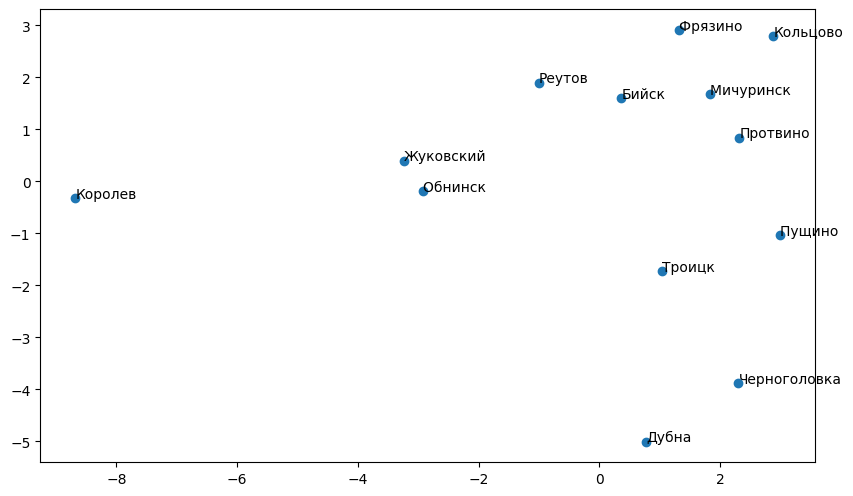

In [43]:
figure(figsize=(10, 6), dpi=100)
plt.scatter(x=First,y=Second)

for i in range(len(First)):
    plt.annotate(data.iloc[i,0], (First[i], Second[i]))

In [55]:
matrA = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
display(pd.DataFrame(matrA))
np.transpose(matrA)

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [57]:
G=pd.DataFrame({'Эксперт1':[2,3,4,6,7,8,1,9,5],'Эксперт2':[7,8,5,9,4,3,1,2,6], 'Эксперт3':[3,9,8,5,7,6,1,2,4],'Эксперт4':[4,8,9,7,6,3,2,1,5], 'Эксперт5':[7,3,4,2,1,8,9,5,6]}, index=["o1","o2","o3","o4","o5","o6","o7","o8","o9"])
G

,Эксперт1,Эксперт2,Эксперт3,Эксперт4,Эксперт5
o1,2,7,3,4,7
o2,3,8,9,8,3
o3,4,5,8,9,4
o4,6,9,5,7,2
o5,7,4,7,6,1
o6,8,3,6,3,8
o7,1,1,1,2,9
o8,9,2,2,1,5
o9,5,6,4,5,6


In [58]:
R=np.dot(G,np.transpose(G))
R

array([[127, 142, 131, 132,  94, 123,  83,  77, 126],
       [142, 227, 208, 197, 167, 150,  63,  84, 157],
       [131, 208, 202, 180, 162, 154,  71,  91, 151],
       [132, 197, 180, 195, 157, 142,  52,  99, 151],
       [ 94, 167, 162, 157, 151, 136,  39,  96, 123],
       [123, 150, 154, 142, 136, 182,  95, 133, 145],
       [ 83,  63,  71,  52,  39,  95,  88,  60,  79],
       [ 77,  84,  91,  99,  96, 133,  60, 115, 100],
       [126, 157, 151, 151, 123, 145,  79, 100, 138]], dtype=int64)

In [63]:
e, v = np.linalg.eigh(R)
print(e)
print("-------------------")
print(v)

[-1.63685652e-14 -1.14868018e-14  7.08206676e-15  2.58361027e-13
  5.11586418e+00  3.00155142e+01  7.42026642e+01  1.36930202e+02
  1.17873576e+03]
-------------------
[[ 0.05538559 -0.01704582 -0.14832063  0.67994724  0.21815563 -0.36845334
   0.46686909  0.15281748 -0.29604887]
 [ 0.1380238  -0.11465064 -0.35668584 -0.41537444  0.52889888  0.14916455
   0.20776171 -0.39055468 -0.41274929]
 [-0.39851587 -0.28557479 -0.08309765  0.23700491 -0.48890282  0.48326759
   0.10153225 -0.23769752 -0.39645069]
 [ 0.1310591  -0.30374058  0.46437592 -0.20657386 -0.25631991 -0.58293654
  -0.07323108 -0.2716349  -0.38416688]
 [ 0.54469142  0.46337545  0.03774978  0.31206826 -0.07935589  0.20818601
  -0.42865931 -0.21535457 -0.33168907]
 [-0.23948701 -0.09523416  0.52760193  0.03254632  0.47358601  0.26391566
  -0.23262153  0.42261576 -0.35707327]
 [ 0.50071445 -0.0294213   0.07456091 -0.29043744 -0.3171916   0.24661609
   0.45283195  0.51262451 -0.17098397]
 [ 0.0116035  -0.29444816 -0.57904767 -0.

In [65]:
v[8]

array([-0.44384469,  0.70809722, -0.0870724 , -0.28200474, -0.15858896,
       -0.21996663,  0.1068385 ,  0.12820399, -0.33631151])